In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import precision_score, recall_score, roc_curve, auc, classification_report

#OBS: Necessário possuir scikit-learn instalado! Para instalar: pip install -U scikit-learn

In [2]:
#Selecionar arquivo CSV usando seleção de janela do Windows (Janela pode aparecer por baixo da janela do navegador!)
import tkinter as tk
from tkinter import filedialog
root = tk.Tk()
root.withdraw()
caminhoArquivoDados = filedialog.askopenfilename(filetypes=[("CSV Files", "*.csv")])

#Carregar dataset para dataframe
df_original = pd.read_csv(caminhoArquivoDados)

In [3]:
#################################### ANÁLISE EXPLORATÓRIA ####################################

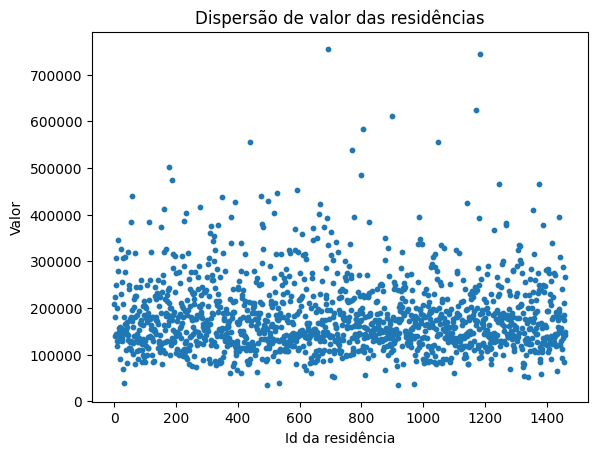

In [4]:
##### Entendendo os valores das casas em um gráfico de dispersão

# Plotar o gráfico de dispersão de valores das casas
x = df_original['Id']
y = df_original['SalePrice']
#cores = np.random.rand(len(x), 3)

plt.scatter(x, y, s=10)

# Adicionar títulos e rótulos dos eixos
plt.title('Dispersão de valor das residências')
plt.xlabel('ID da residência')
plt.ylabel('Valor')
plt.show()


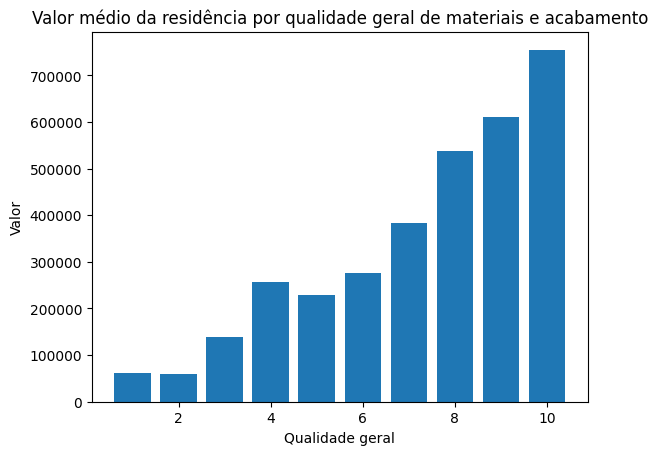

In [5]:
##### Pergunta: Qual o preço médio das casas baseado na sua qualidade de material e acabamento?

# Plotar gráfico de barras de preço em relação a qualidade geral de materiais e acabamento
plt.bar(df_original['OverallQual'], df_original['SalePrice'])

# Adicionando título e rótulos dos eixos
plt.title('Valor médio da residência por qualidade geral de materiais e acabamento')
plt.xlabel('Qualidade geral')
plt.ylabel('Valor')

# Exibição do gráfico
plt.show()

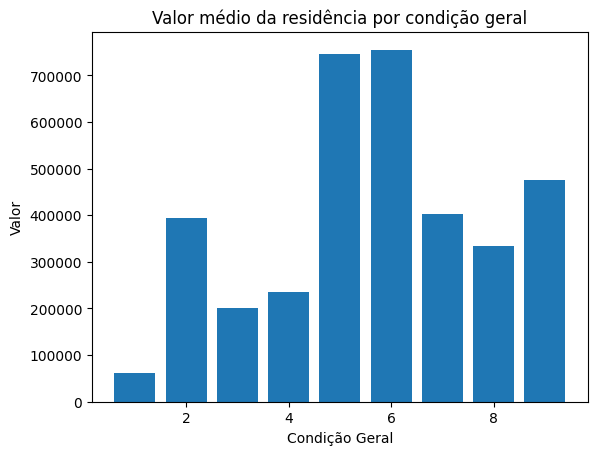

In [6]:
##### Pergunta: Qual o preço médio das casas baseado na sua condição geral?

# Plotar gráfico de barras de preço em relação a condição
plt.bar(df_original['OverallCond'], df_original['SalePrice'])

# Adicionando título e rótulos dos eixos
plt.title('Valor médio da residência por condição geral')
plt.xlabel('Condição Geral')
plt.ylabel('Valor')

# Exibição do gráfico
plt.show()

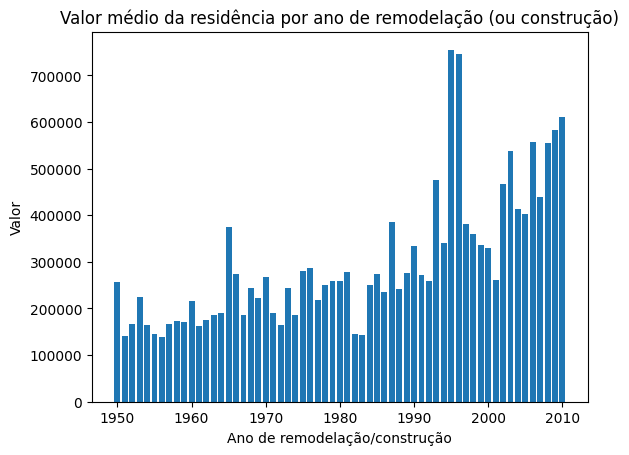

In [7]:
##### Pergunta: Qual o preço médio das casas baseado no ano de remodelação?

# Plotar gráfico de barras de preço em relação ao ano de remodelação (ou construção em casas nunca remodeladas)
plt.bar(df_original['YearRemodAdd'], df_original['SalePrice'])

# Adicionando título e rótulos dos eixos
plt.title('Valor médio da residência por ano de remodelação (ou construção)')
plt.xlabel('Ano de remodelação/construção')
plt.ylabel('Valor')

# Exibição do gráfico
plt.show()

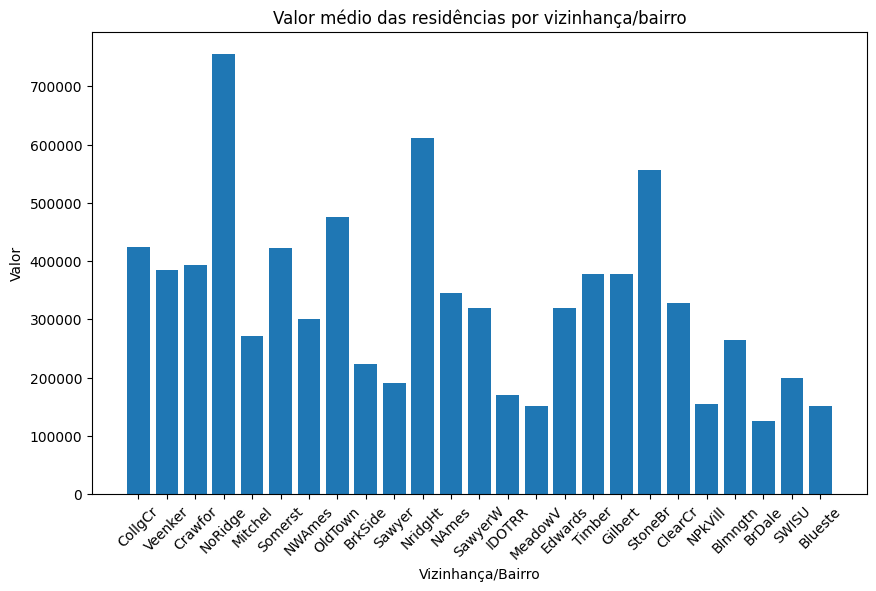

In [8]:
##### Pergunta: Qual o preço médio das casas baseado na sua vizinhança/bairro?

# Aumentar o tamanho do gráfico
plt.figure(figsize=(10, 6))

# Plotar gráfico de barras de preço em relação a vizinhança
plt.bar(df_original['Neighborhood'], df_original['SalePrice'])

# Adicionando título e rótulos dos eixos
plt.title('Valor médio das residências por vizinhança/bairro')
plt.xlabel('Vizinhança/Bairro')
plt.ylabel('Valor')

# Rotacionar rótulos do eixo x
plt.xticks(rotation=45)

# Exibição do gráfico
plt.show()

In [9]:
#################################### FEATURING ENGINEERING ####################################

In [10]:
########## Remover casas com valores outliers

# Calcular o intervalo interquartil
Q1 = df_original['SalePrice'].quantile(0.25)
Q3 = df_original['SalePrice'].quantile(0.75)
IQR = Q3 - Q1

# Definir limites para identificar outliers
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

# Remover outliers
df_cleaned = df_original[(df_original['SalePrice'] >= limite_inferior) & (df_original['SalePrice'] <= limite_superior)]

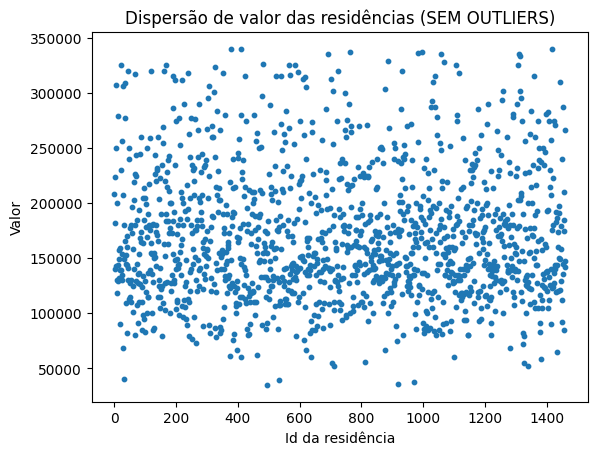

In [11]:
########## Visualizar gráfico de dispersão de valores das casas sem outliers

# Plotar o gráfico de dispersão de valores das casas
x = df_cleaned['Id']
y = df_cleaned['SalePrice']

plt.scatter(x, y, s=10)

# Adicionar títulos e rótulos dos eixos
plt.title('Dispersão de valor das residências (SEM OUTLIERS)')
plt.xlabel('ID da residência')
plt.ylabel('Valor')
plt.show()